# <center>ENEM - pt. 8
<hr>

## <center>Inicialização
<hr>

In [1]:
from tcc_funcoes import *


=================================== Módulo importado com sucesso ===================================



In [2]:
dc_nome_grafico = {
    'Ciências Humanas': 'Humanas',
    'Ciências Natureza': 'Natureza',
    'Linguagem e Código': 'Linguagem',
    'Matemática': 'Matemática',
    'Redação': 'Redação'
}

In [3]:
dc_nome_salvar = abre_arquivo_pickle('dc_nome_salvar.pkl')

## <center>Análise do Grid Search - XGBoost
<hr>

In [4]:
dc_xgb_grid_search = abre_arquivo_pickle('dc_xgb_grid_search.pkl')

dc_temp = {}

for nome, v in dc_xgb_grid_search.items():

    dc_temp[nome] = pd.DataFrame(v).T.reset_index(drop=True)

    dc_temp[nome] = pd.concat([dc_temp[nome].drop(['parametro'], axis = 1), dc_temp[nome]['parametro'].apply(pd.Series)], axis = 1)

dc_xgb_grid_search = dc_temp

In [5]:
# for nome, df in dc_xgb_grid_search.items():

#     nome_salvar = dc_nome_salvar[nome]

#     plt.figure(figsize=(8, 6))

#     data = df['rmse'].sort_values(ascending=False).reset_index(drop=True)

#     data = 100 * data / data.max()

#     plt.plot(
#         data,
#         marker='o',
#         linestyle='-',
#         color='black',
#         markeredgecolor='red',
#         markerfacecolor='white',
#         alpha=0.7
#         )

#     plt.xticks([])

#     plt.xlabel('interações do grid search ordenadas por erro')
#     plt.ylabel('% do erro máximo')

#     plt.savefig(f"../texto/imagens/erro_grid_xgb_{nome_salvar}.png", dpi=300, bbox_inches='tight')
#     plt.show()


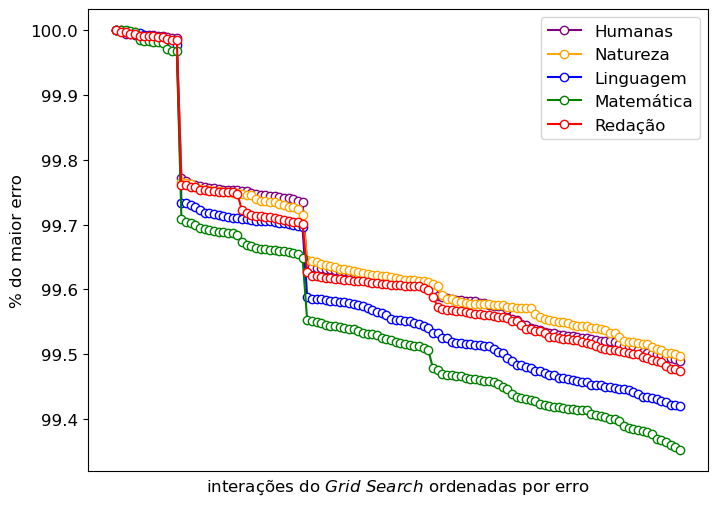

In [6]:
plt.figure(figsize=(8, 6))

plt.xticks([])
plt.yticks(fontsize=12)

plt.xlabel(r'interações do $\it{Grid\ Search}$ ordenadas por erro', fontsize=12)
plt.ylabel('% do maior erro', fontsize=12)

dc_cor = {
    'Redação': 'red',
    'Linguagem e Código': 'blue',
    'Matemática': 'green',
    'Ciências Natureza': 'orange',
    'Ciências Humanas': 'purple'
    }

for nome, df in dc_xgb_grid_search.items():

    data = df['rmse'].sort_values(ascending=False).reset_index(drop=True)

    data = 100 * data / data.max()

    data = data[::2]

    plt.plot(
        data,
        marker='o',
        linestyle='-',
        color=dc_cor[nome],
        markerfacecolor='white',
        alpha=1,
        label=dc_nome_grafico[nome],
        linewidth=1.5
        )

plt.legend(fontsize=12)

plt.savefig(f"../texto/imagens/erro_grid_xgb.png", dpi=300, bbox_inches='tight')

plt.show()


In [7]:
dc_parametros_xgb = {}

for nome, df in dc_xgb_grid_search.items():

    dc_params = df.sort_values(by='rmse', ascending=True).head(1).drop(['tempo'], axis = 1).to_dict('records')[0]

    dc_parametros_xgb[nome] = dc_params

salva_arquivo_pickle('dc_parametros_xgb.pkl', dc_parametros_xgb)

## <center>Análise do Grid Search - LightGBM
<hr>

In [8]:
dc_lgbm_grid_search = abre_arquivo_pickle('dc_lgbm_grid_search.pkl')

dc_temp = {}

for nome, v in dc_lgbm_grid_search.items():

    dc_temp[nome] = pd.DataFrame(v).T.reset_index(drop=True)

    dc_temp[nome] = pd.concat([dc_temp[nome].drop(['parametro'], axis = 1), dc_temp[nome]['parametro'].apply(pd.Series)], axis = 1)

dc_lgbm_grid_search = dc_temp

In [9]:
# for nome, df in dc_lgbm_grid_search.items():

#     nome_salvar = dc_nome_salvar[nome]

#     plt.figure(figsize=(8, 6))

#     data = df['rmse'].sort_values(ascending=False).reset_index(drop=True)

#     data = 100 * data / data.max()

#     plt.plot(
#         data,
#         marker='o',
#         linestyle='-',
#         color='black',
#         markeredgecolor='red',
#         markerfacecolor='white',
#         alpha=0.7
#         )

#     plt.xticks([])

#     plt.xlabel('interações do grid search ordenadas por erro')
#     plt.ylabel('% do erro máximo')

#     plt.savefig(f"../texto/imagens/erro_grid_lgbm_{nome_salvar}.png", dpi=300, bbox_inches='tight')
#     plt.show()


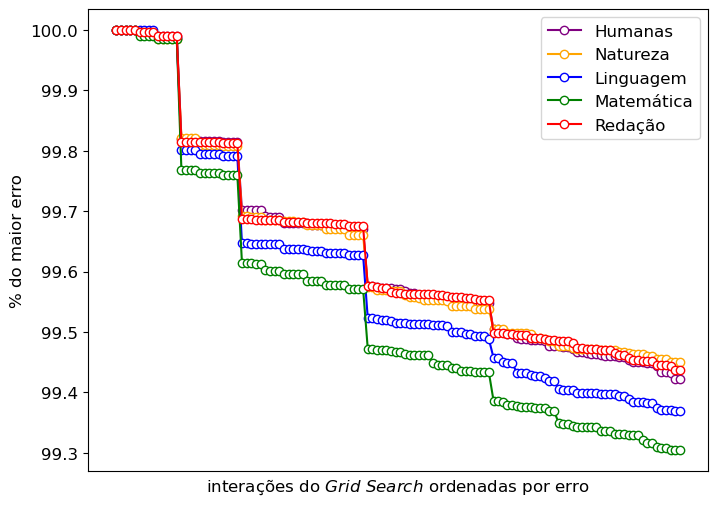

In [10]:
plt.figure(figsize=(8, 6))

plt.xticks([])
plt.yticks(fontsize=12)

plt.xlabel(r'interações do $\it{Grid\ Search}$ ordenadas por erro', fontsize=12)
plt.ylabel('% do maior erro', fontsize=12)

dc_cor = {
    'Redação': 'red',
    'Linguagem e Código': 'blue',
    'Matemática': 'green',
    'Ciências Natureza': 'orange',
    'Ciências Humanas': 'purple'
    }

for nome, df in dc_lgbm_grid_search.items():

    data = df['rmse'].sort_values(ascending=False).reset_index(drop=True)

    data = 100 * data / data.max()

    data = data[::2]

    plt.plot(
        data,
        marker='o',
        linestyle='-',
        color=dc_cor[nome],
        markerfacecolor='white',
        alpha=1,
        label=dc_nome_grafico[nome],
        linewidth=1.5
        )

plt.legend(fontsize=12)

plt.savefig(f"../texto/imagens/erro_grid_lgbm.png", dpi=300, bbox_inches='tight')

plt.show()


In [11]:
dc_parametros_lgbm = {}

for nome, df in dc_lgbm_grid_search.items():

    dc_params = df.sort_values(by='rmse', ascending=True).head(1).drop(['tempo'], axis = 1).to_dict('records')[0]

    dc_parametros_lgbm[nome] = dc_params

salva_arquivo_pickle('dc_parametros_lgbm.pkl', dc_parametros_lgbm)

## <center>Análise do Grid Search - Random Forest
<hr>

In [12]:
dc_rf_grid_search = abre_arquivo_pickle('dc_rf_grid_search.pkl')

dc_temp = {}

for nome, v in dc_rf_grid_search.items():

    dc_temp[nome] = pd.DataFrame(v).T.reset_index(drop=True)

    dc_temp[nome] = pd.concat([dc_temp[nome].drop(['parametro'], axis = 1), dc_temp[nome]['parametro'].apply(pd.Series)], axis = 1)

dc_rf_grid_search = dc_temp

In [13]:
# for nome, df in dc_rf_grid_search.items():

#     nome_salvar = dc_nome_salvar[nome]

#     plt.figure(figsize=(8, 6))

#     data = df['rmse'].sort_values(ascending=False).reset_index(drop=True)

#     data = 100 * data / data.max()

#     plt.plot(
#         data,
#         marker='o',
#         linestyle='-',
#         color='black',
#         markeredgecolor='red',
#         markerfacecolor='white',
#         alpha=0.7
#         )

#     plt.xticks([])

#     plt.xlabel('interações do grid search ordenadas por erro')
#     plt.ylabel('% do erro máximo')

#     plt.savefig(f"../texto/imagens/erro_grid_rf_{nome_salvar}.png", dpi=300, bbox_inches='tight')
#     plt.show()


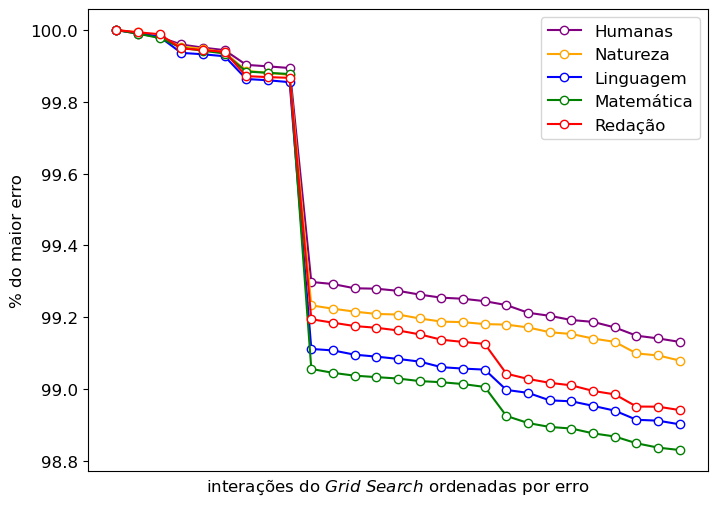

In [14]:
plt.figure(figsize=(8, 6))

plt.xticks([])
plt.yticks(fontsize=12)

plt.xlabel(r'interações do $\it{Grid\ Search}$ ordenadas por erro', fontsize=12)
plt.ylabel('% do maior erro', fontsize=12)

dc_cor = {
    'Redação': 'red',
    'Linguagem e Código': 'blue',
    'Matemática': 'green',
    'Ciências Natureza': 'orange',
    'Ciências Humanas': 'purple'
    }

for nome, df in dc_rf_grid_search.items():

    data = df['rmse'].sort_values(ascending=False).reset_index(drop=True)

    data = 100 * data / data.max()

    plt.plot(
        data,
        marker='o',
        linestyle='-',
        color=dc_cor[nome],
        markerfacecolor='white',
        alpha=1,
        label=dc_nome_grafico[nome],
        linewidth=1.5
        )

plt.legend(fontsize=12)

plt.savefig(f"../texto/imagens/erro_grid_rf.png", dpi=300, bbox_inches='tight')

plt.show()


In [15]:
dc_parametros_rf = {}

for nome, df in dc_rf_grid_search.items():

    dc_params = df.sort_values(by='rmse', ascending=True).head(1).drop(['tempo'], axis = 1).to_dict('records')[0]

    dc_parametros_rf[nome] = dc_params

salva_arquivo_pickle('dc_parametros_rf.pkl', dc_parametros_rf)

## <center>Hiperparametros finais
<hr>

In [16]:
print(" XGBoost ".center(60, '='))
print()

print(pd.DataFrame(dc_parametros_xgb))
print()

print(" LightGBM ".center(60, '='))
print()

print(pd.DataFrame(dc_parametros_lgbm))
print()

print(" Random Forest ".center(60, '='))
print()

print(pd.DataFrame(dc_parametros_rf))
print()

========================= XGBoost ==========================

                  Ciências Humanas  Ciências Natureza  Linguagem e Código  \
rmse                     75.351906          65.120758           63.051487   
learning_rate             0.100000           0.100000            0.100000   
max_depth                10.000000          10.000000           10.000000   
min_child_weight         10.000000          10.000000            1.000000   
colsample_bytree          0.700000           0.700000            0.700000   
subsample                 1.000000           1.000000            1.000000   

                  Matemática     Redação  
rmse               95.976074  148.119446  
learning_rate       0.100000    0.100000  
max_depth          10.000000   10.000000  
min_child_weight    5.000000    5.000000  
colsample_bytree    0.700000    0.700000  
subsample           1.000000    1.000000  

========================= LightGBM =========================

                   Ciências Humana

In [ ]:
exit()

: 